# **Used Cars Pricing in Saudi Arabia**

## _**Analysis by: Kresna Dewa Kumbara**_

![UsedCars](https://img.freepik.com/free-photo/row-new-cars-port_335224-806.jpg?w=1380&t=st=1715138269~exp=1715138869~hmac=a28a2592e434a19e9669a132d19df9b84381d57b23f9bacf3b9f0c700170b879)

## **Business Problem Understanding**

### **Background**

In Saudi Arabia, like in any other country, there exists a significant number of motorists who routinely replace their cars after several years of use. These vehicles are often sold to dealers who specialize in refurbishing and testing them before reselling to consumers at reasonable prices. However, with the rise of the internet, buying and selling used cars has become easier than ever, with numerous websites facilitating transactions.

One such online dealer is syarah.com. On this platform, sellers need only create an account and verify their email to list their cars for sale. For buyers, the process is even simpler as they can browse car prices without registering. However, this ease of access presents a challenge for syarah.com. As an online car dealer, their profitability hinges on attracting both buyers and sellers to the platform. In a sense their revenue is generated when users visit the site and when sellers opt to prioritize their listings using ads. Thus, it is crucial for the website to attract a large number of buyers and have a diverse pool of sellers to meet the demands of the market, so that more users will visit the site.

### **Business Problem**

To attract users to their website, syarah.com could implement a price recommendation system for sellers listing their cars for sale. With such a system, sellers would receive a price approximation for their vehicles, while buyers would gain a rough idea of the prices for cars they wish to purchase. However, such a system comes with its own drawbacks, one of which is determining which data is needed to utilize when providing these recommendations. **Therefore it is important to know which factor plays the most significant role in determining the price of a car and how to get the most accurate price estimation to recommend to the users.**

### **Goals**

To implement the recommendation system, many features have to be considered, such as make and type, year, mileage, origin, options, and even the gear type of a car, as these factors can affect its overall selling price. It is also worth noting that a car with the same features could have different prices in different regions, therefore these features could have a different level of significance that will contribute to the accuracy of the system.

**The goal of this particular machine learning model is to provide the most accurate price recommendation by considering these features.** With such a system in place, more users are likely to use the website to do transactions, thereby providing more data to improve the accuracy of the model over time. This, in turn, could increase user engagement and potentially boost the company's revenue from more sellers buying ads on the website to promote their listing.

### **Analytic Approach**

A rough roadmap to achieve this is by understanding the already established data. The first step is EDA, which involves checking if the given data is clean or needs to be worked on before implementing it into the model. Next is to determine which features hold the most significant role in establishing the price. After that is creating a model that will interpret the features and compare them to the test samples provided.

**In this particular case and also with my current understanding, the most straightforward way to create several models to compare the results of the prediction is using Regression Analysis.**

### **Metric Evaluation**

After the models has given their results, the model with the **best RMSE, MAE and MAPE value** will be picked as the benchmark. After finding the benchmark, another test is then done to find the best estimator of said model and afterwards the new test results is compared to the benchmark, using the best estimator, to find out if the model is more accurate after tuning or not.

<br>

---

## **Dictionary**

[Data Source](https://www.kaggle.com/datasets/raihanmuhith/saudi-arabia-used-car)

1. The dataset contains 5624 records of used cars collected from syarah.com.
    -   Each row represents a used car.

<br>

| Features | Description |
| --- | --- |
| Type | Type of used car |
| Region | The region in which the used car was offered for sale |
| Make | The company name |
| Gear_Type | Gear type size of used car |
| Origin | Origin of used car |
| Options | Options of used car |
| Year | Manufacturing year |
| Engine_Size | The engine size of used car |
| Mileage | Mileage of used car	|
| Negotiable | True if the price is 0, that means it is negotiable |
| Price | Used car price |

<br>

---

## **Standard Library**

In [478]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Possible automatic EDA
## from ydata_profiling import ProfileReport

import missingno as msno 

# Show all the columns
pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

---

## **Exploratory Data Analysis**

### _**Dataset**_

In [479]:
# Opening the dataset
df = pd.read_csv('used_cars_saudi_arabia.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


### _**Dataset Shape**_

In [480]:
# Checking the size of the data
print('Rows    :', df.shape[0])
print('Columns :', df.shape[1])

Rows    : 5624
Columns : 11


### Observation

- The dataset has 11 columns and 5624 rows.

### _**Value Checking**_

In [481]:
# Value type in the dataset
print('Dataset Info:')
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

df_desc = pd.DataFrame(data= listItem,
                       columns= ['Features', 'Type', 'NA', 'Unique_Count', 'Unique_Name'])

display(df_desc)
print()

# Duplicates
print('Duplicates:', df.duplicated().sum())
display(df[df.duplicated() == True])

Dataset Info:


,Features,Type,NA,Unique_Count,Unique_Name
0,Type,object,0,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3,..."
1,Region,object,0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, ..."
2,Make,object,0,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche,..."
3,Gear_Type,object,0,2,"[Manual, Automatic]"
4,Origin,object,0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,3,"[Standard, Full, Semi Full]"
6,Year,int64,0,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 199..."
7,Engine_Size,float64,0,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, ..."
8,Mileage,int64,0,1716,"[421000, 80000, 140000, 220000, 49000, 25000, ..."
9,Negotiable,bool,0,2,"[True, False]"



Duplicates: 4


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


### Observation

- In the dataset exists 4 columns with numerical values and 7 columns with categorical values. There are 3 integer and 1 floating data type in the numerical columns, whereby the categorical columns have 6 object and 1 boolean data type.

### _**Features**_

#### Categorical Values

In [482]:
# Categorical Values
print('Categorical Values:')
display(df.describe(include= ['object', 'bool']))

Categorical Values:


,Type,Region,Make,Gear_Type,Origin,Options,Negotiable
count,5624,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3,2
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,False
freq,269,2272,1431,4875,4188,2233,3828


##### Visualized

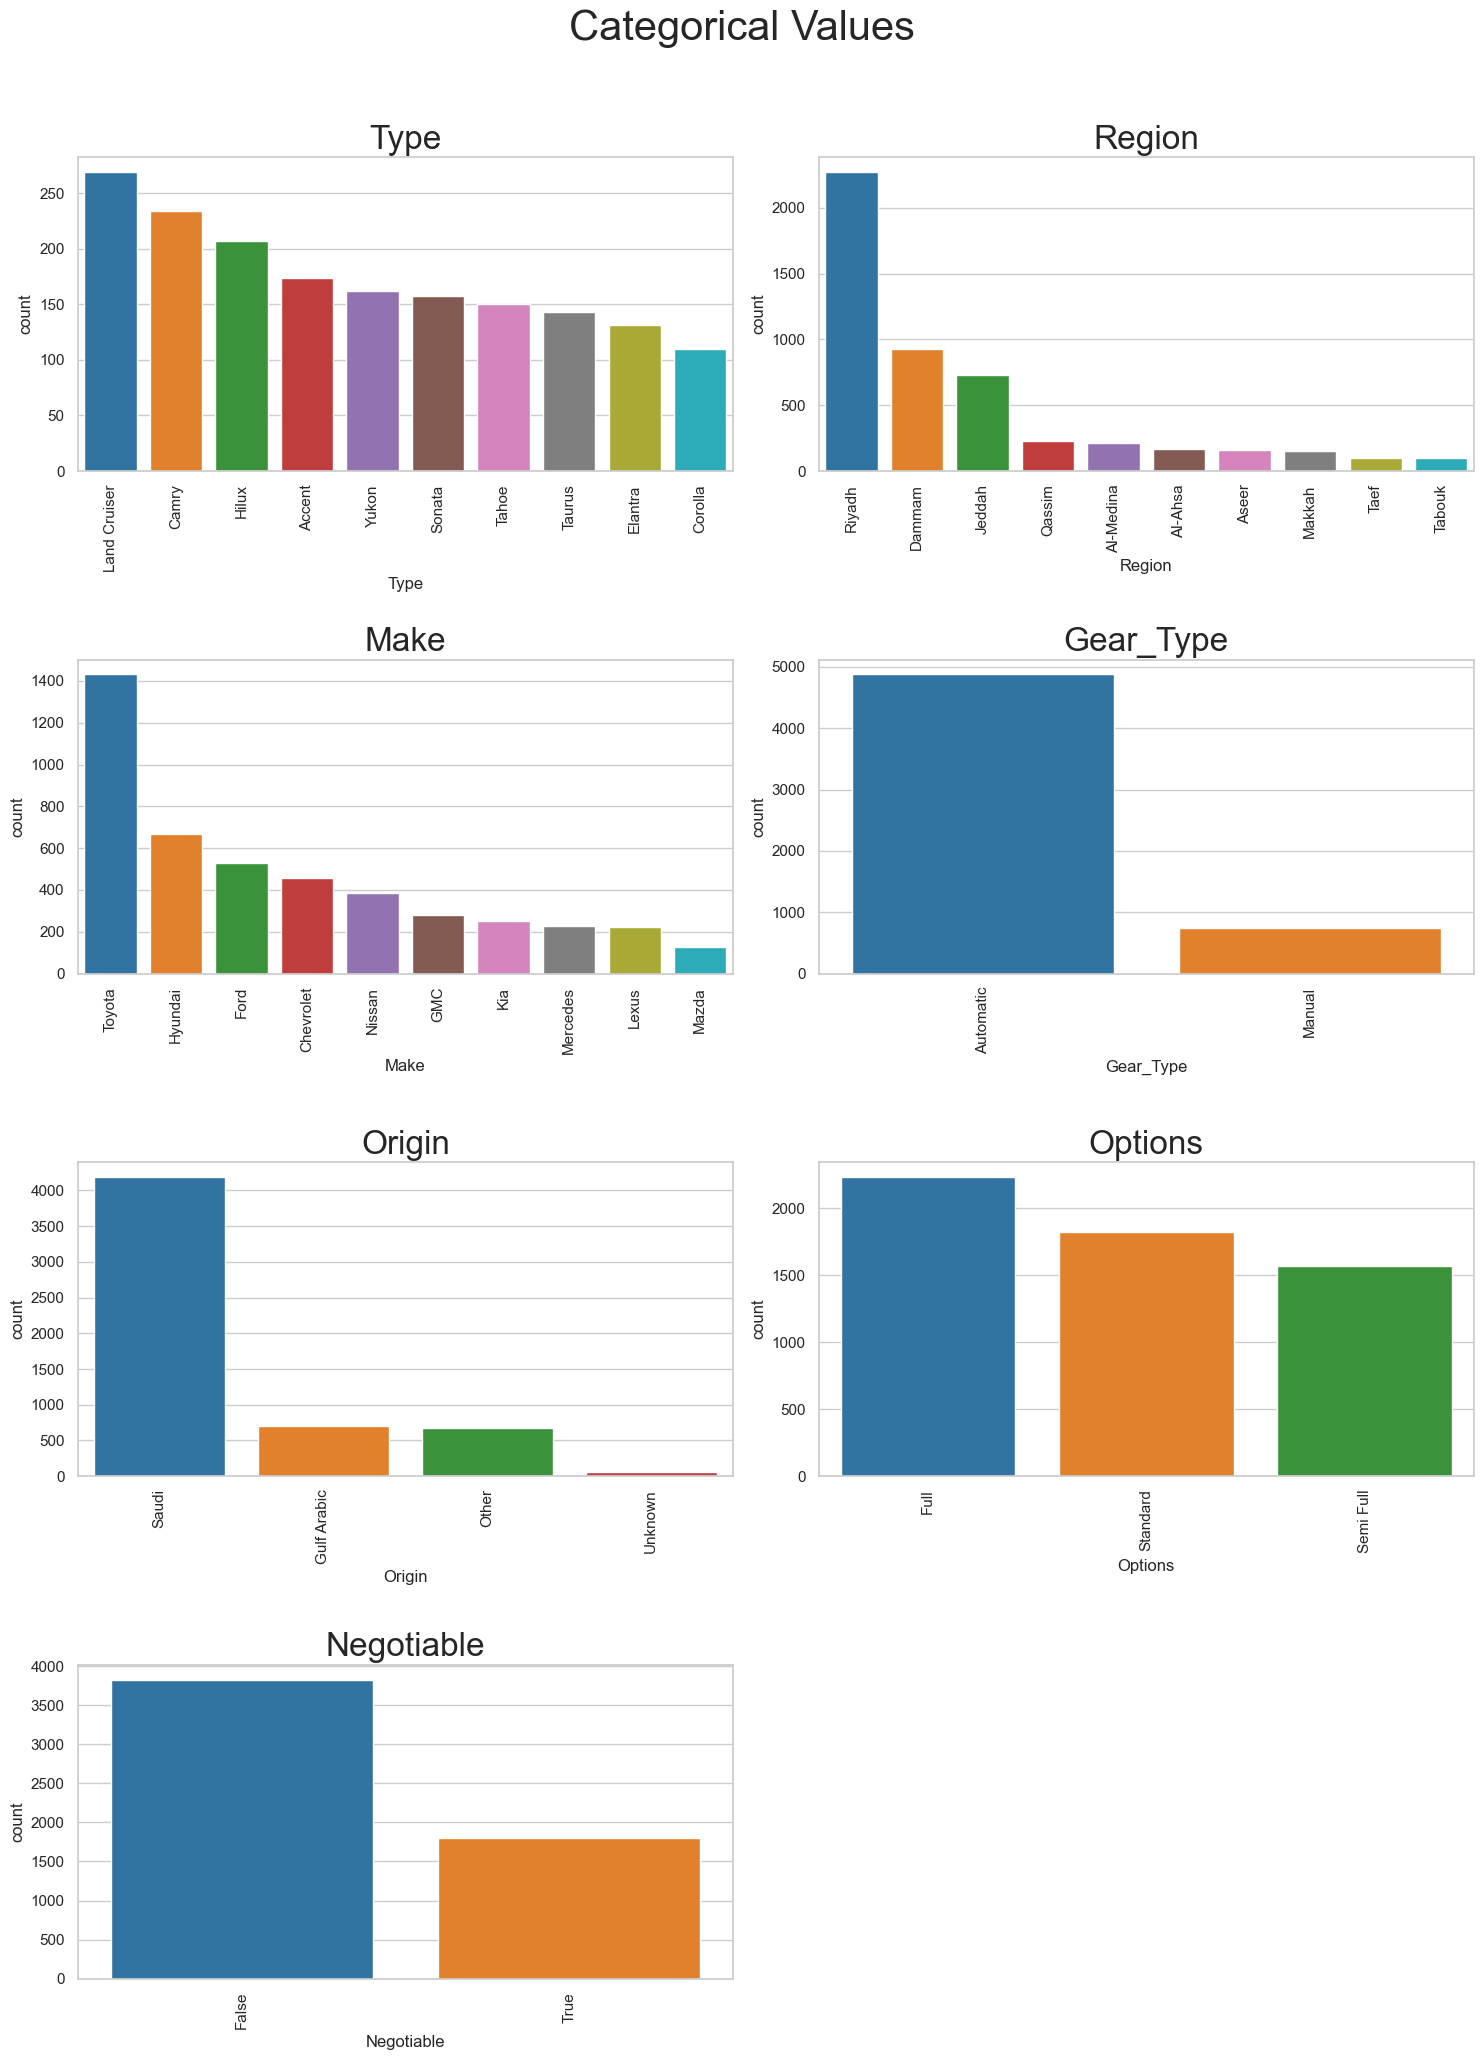

In [483]:
# Defining the categorical columns
columns = ['Type','Region','Make', 'Gear_Type', 'Origin', 'Options', 'Negotiable']

plt.figure(figsize= (15,21))

for i, variable in enumerate(columns):
      plt.subplot(4,2,i+1)
      
      top_categories = df[variable].value_counts().head(10).index 
      ax = sns.countplot(data= df, x= df[variable],
                         order= top_categories, palette= 'tab10')
            
      plt.xticks(rotation=90)
      plt.tight_layout()
      plt.title(variable,
                fontsize= 24)
      
plt.suptitle('Categorical Values',
             fontsize= 30)

plt.subplots_adjust(top=0.91,
                    hspace=0.6)
      
plt.show()

#### Observation

- There are 347 unique type of cars from 58 different makers and spread over 27 regions in Saudi Arabia. Most of the cars are from the Saudi Arabia and nearly half are located in the Riyadh region. The most popular car make is Toyota and the most popular type is Land Cruiser. Nearly 90% of the cars have an automatic gear type and close to half are sold with full options (has many features installed in or on the car), while a 1/3 of the cars are negotiable before purchase.

- There are only 4 duplicate rows in the dataset and no values are missing from the dataset.

#### Numerical Values

In [484]:
# Numerical Values
print('Numerical Values:')
display(df.describe().astype('int64', 'float64'))

Numerical Values:


,Year,Engine_Size,Mileage,Price
count,5624,5624,5624,5624
mean,2014,3,150923,53074
std,5,1,382835,70155
min,1963,1,100,0
25%,2012,2,38000,0
50%,2016,3,103000,36500
75%,2018,4,196000,72932
max,2022,9,20000000,850000


##### Visualized

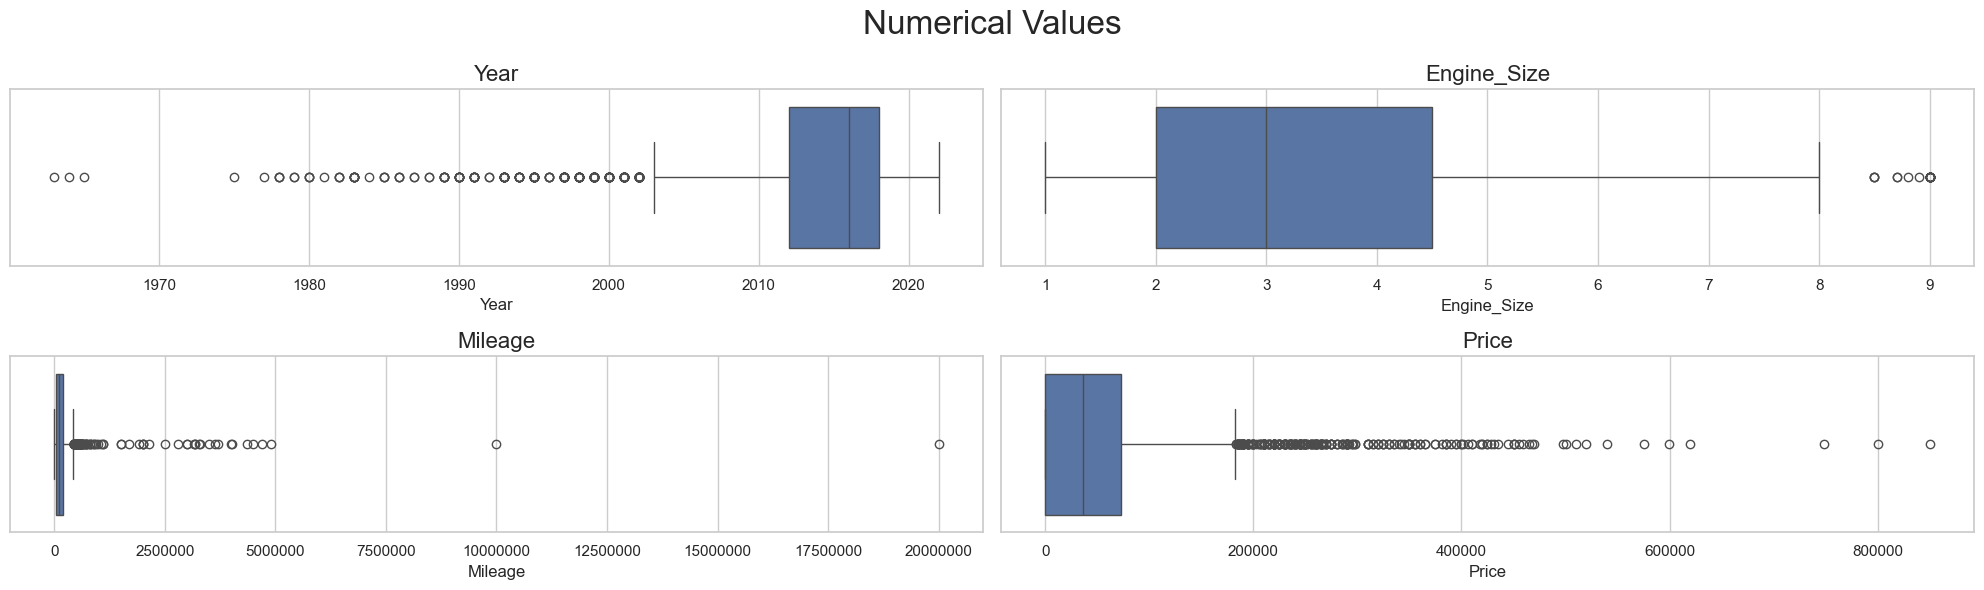

In [485]:
# Checking value range with box plot
num_feature = df.describe().columns

plt.figure(figsize= (20,6), facecolor= 'white')
sns.set(style= 'whitegrid')
plt.suptitle('Numerical Values',
             fontsize= 24)
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(2,2,plotnumber)
    sns.boxplot(data=df, x=feature);
    plt.title(feature, size=16)
    plt.tight_layout()
    plt.ticklabel_format(axis= 'x', style= 'plain')
    plotnumber += 1

plt.show()

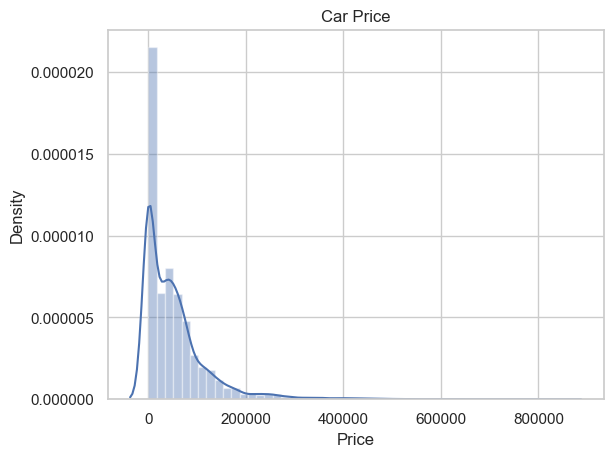

In [486]:
sns.distplot(df['Price']);

plt.title('Car Price')
plt.ticklabel_format(axis= 'y', style= 'plain')

plt.show()

#### Observation

- There are several extreme outliers in both Year and Mileage columns, observed by creating a boxplot to visualize the values. While the Engine_Size has only several reasonable outiers

- Most of the cars are made between 1963 and 2022, with the majority produced after the year 2000, therefore the produced graph is left skewed.

- The engine size of the car has a range between 1000cc (1L) to 9000cc (9L) and the majority of the cars have an engine size between 2000cc (2L) to 4500cc (4.5L), that is why the graph is right skewed.

- The cars have mileage ranging from 100 to 20_000_000 miles eventhough the top limit is quite impossible to achieve, therefore it can be considered as outliers and thus made the graph right skewed.

- From the previous observation, it is shown that there are 1797 cars that have 0 price which are connected to the negotiable value of said car. The most expensive car above 800.000 Riyal and when shown in graph form, the graph is right skewed.

#### **Missing Values**

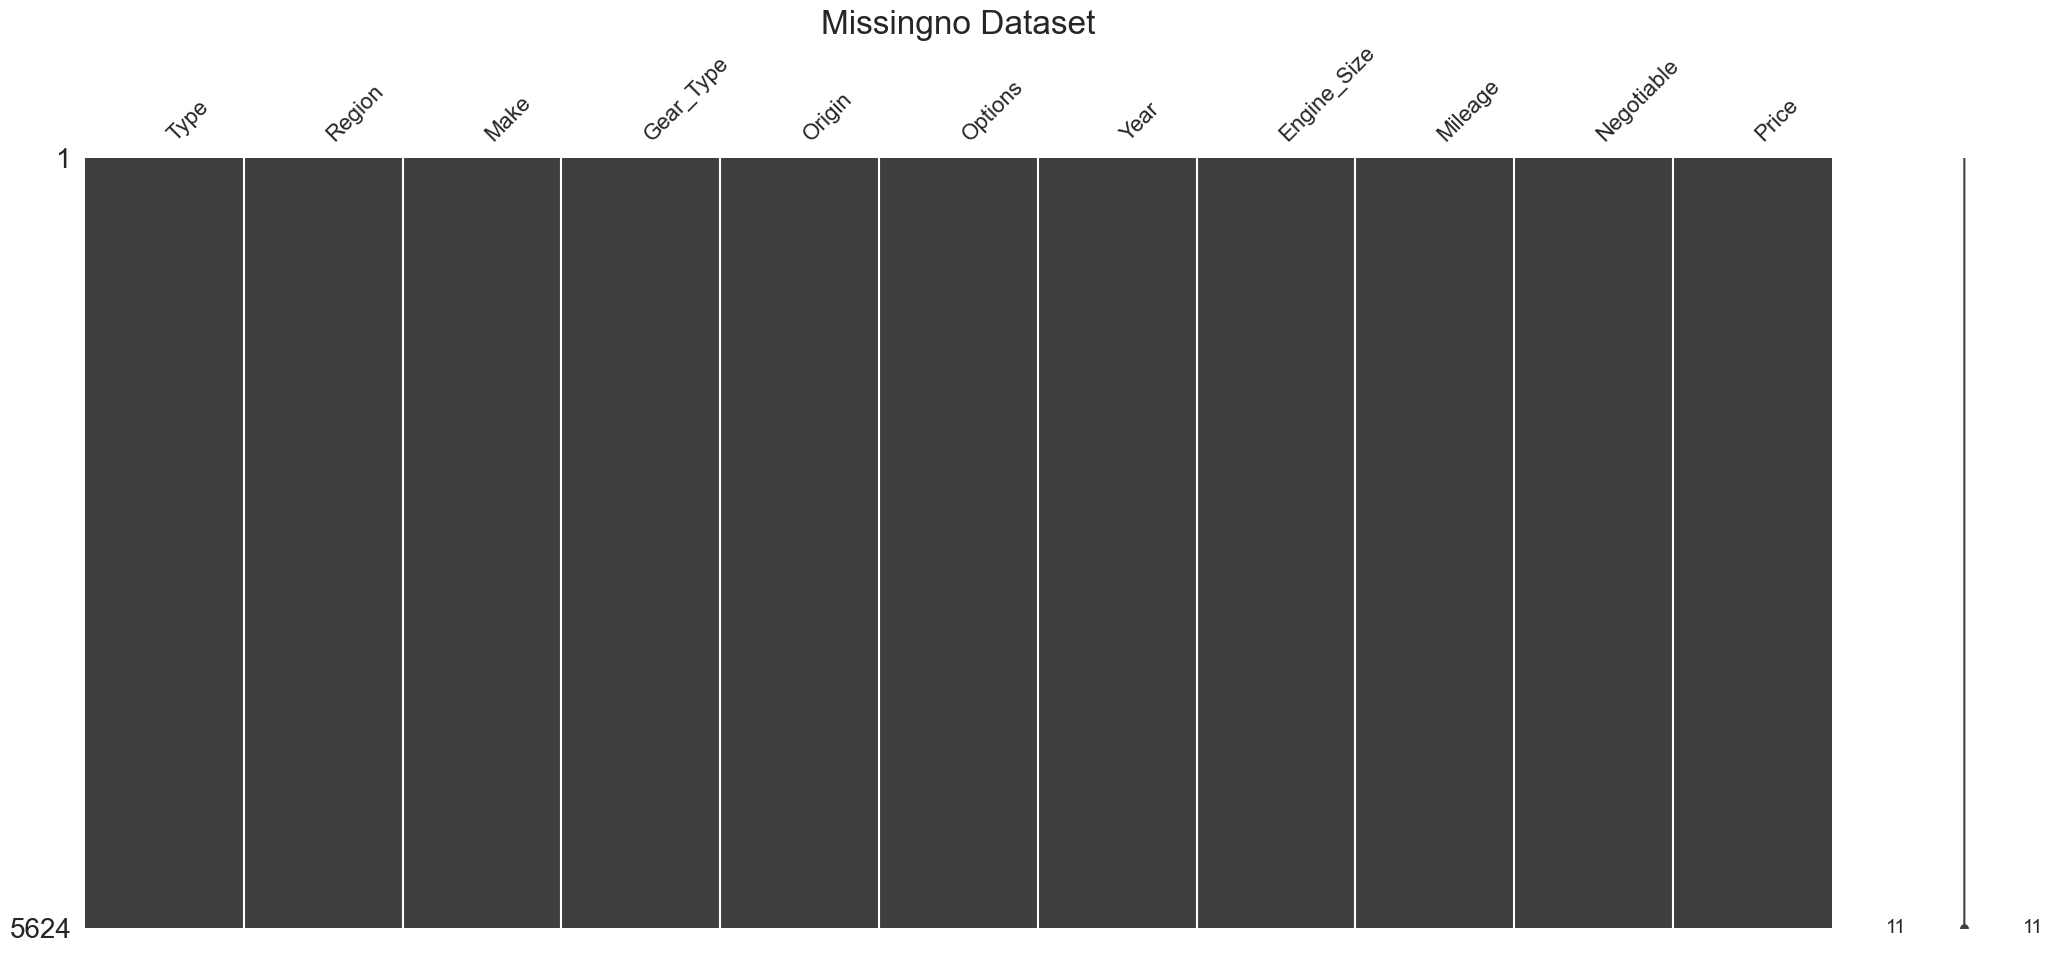

In [487]:
# Checking missing values using missingno
msno.matrix(df)
plt.title('Missingno Dataset',
          fontsize= 24)

plt.show()

#### Observation

- Using missingno, it is shown that there are no missing values in the dataset.

### _**Correlation**_

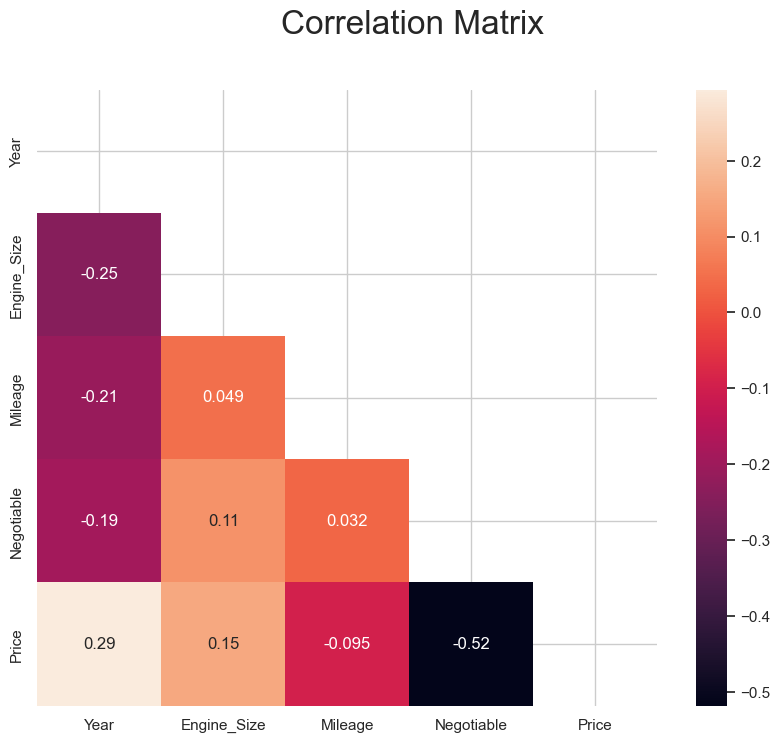

In [488]:
# Checking correlation with heatmap
plt.figure(figsize= (10,8))
sns.heatmap(df.corr(numeric_only= True), mask = np.triu(np.ones_like(df.corr(numeric_only= True))), annot= True)
plt.suptitle('Correlation Matrix',
          fontsize= 24)
plt.show()

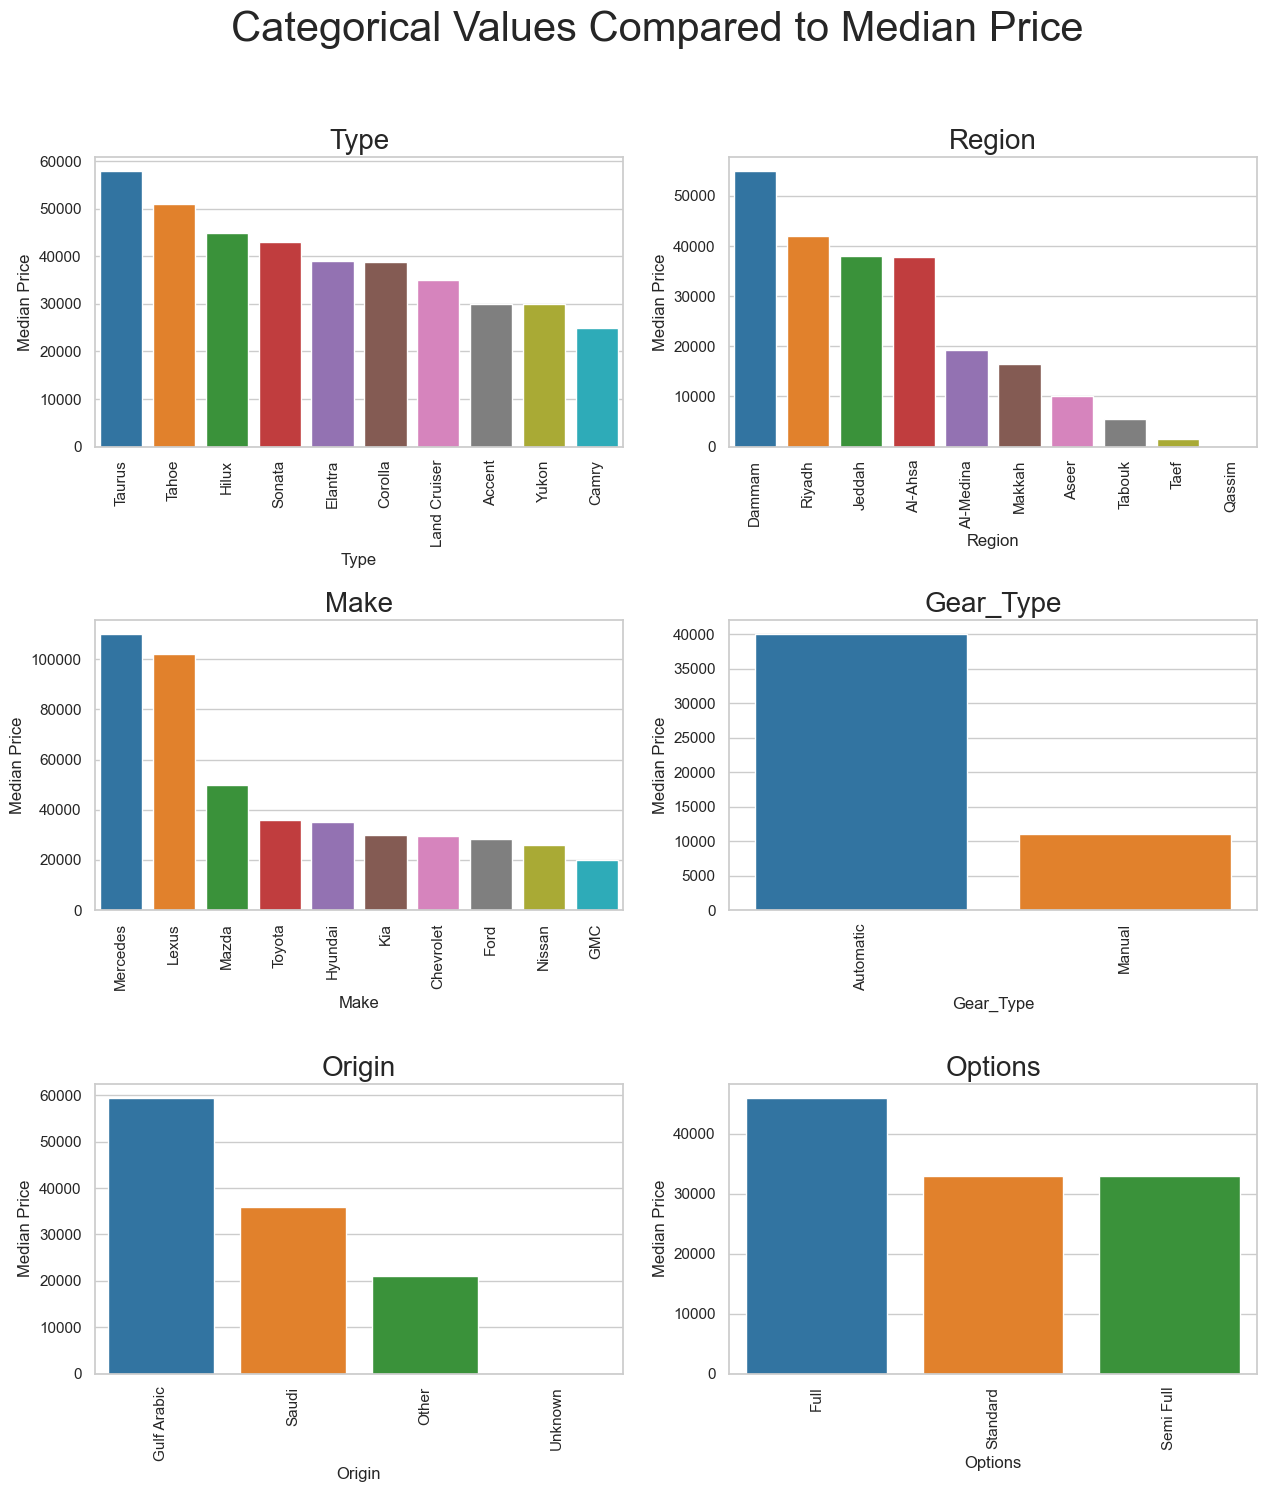

In [489]:
# Defining the categorical columns
columns = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

plt.figure(figsize=(15, 21))

for i, variable in enumerate(columns):
    plt.subplot(4, 2, i + 1)
    
    top_categories = df[variable].value_counts().head(10).index 
    
    # Calculate median price for top categories
    median_prices = df.groupby(variable)['Price'].median().loc[top_categories]
    
    # Sort categories based on median prices
    sorted_categories = median_prices.sort_values(ascending=False).index
    
    ax = sns.barplot(x=top_categories, y=median_prices, order=sorted_categories, palette='tab10')
    ax.set_ylabel('Median Price')
    
    plt.xticks(rotation=90)
    plt.title(variable, fontsize=20)
    
plt.suptitle('Categorical Values Compared to Median Price', fontsize=30)

plt.subplots_adjust(top=0.91, hspace=0.6)

plt.show()

### Observation

- The heatmap shows that there are no strong correlation between any of the numerical features and the price (which is the target). The highest correlation exists between Year and Price at 0.29, on the opposite side the Negotiable column can be disregarded as it is directly correlates to the price being 0.

- When compared to the price, it is better to use a barchart. These individual barchart shows the median price of each categories in descending order. The highest median price is when a car has an automatic gearbox, originated from the Gulf Arabic, is sold with the full options, and is located in Dammam. As for the make and type, Mercedes has the top spot and Ford Taurus is the type of car with the highest median price.

<br>

---

## **Data Preprocessing**

### _**Create Copy**_

In [490]:
# Create a copy from the original dataset
df_model = df.copy()

### _**Remove Duplicates**_

In [491]:
# Checking the dataset Shape
print('Dataset Shape:', df_model.shape)
print()

# Checking and removing the duplicates
print('Duplicated values:', df_model.duplicated().sum())
print()

# Dropping the duplicates
df_model = df_model.drop_duplicates()

# Checking if the duplicates are dropped
print('Updated Dataset Shape:', df_model.shape)

Dataset Shape: (5624, 11)

Duplicated values: 4

Updated Dataset Shape: (5620, 11)


### Reasoning
- The 4 duplicated values are redundant when used for modelling.

### _**Remove Negotiable Cars**_

In [492]:
# Check for negotiable cars
print('- Negotiable cars -')
display(df_model[df_model['Negotiable'] == True])

# Dropping the row
df_model.drop(df_model[df_model['Negotiable'] == True].index, inplace= True)

# Check if the row is dropped
print('- Updated dataset without negotiable cars -')
display(df_model[df_model['Negotiable'] == False])

- Negotiable cars -


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


- Updated dataset without negotiable cars -


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


### Reasoning

- The 1795 Negotiable cars, which have the price of 0, is unnecessary for the algorithm. The price of could be filled using Simple or Iterative imputer, but to learn about the price, it's better to remove them. So that the algorithm will process real data, rather than the one added by using mean, median or modus.

### _**Remove Mileage Outliers**_

In [493]:
# Checking for mileage outliers
df_model[df_model['Mileage'] > ((2024 - df_model['Year']) * 500 * 365)]

print('- Cars with mileage above 500 per day -')
display(df_model[df_model['Mileage'] > ((2024 - df_model['Year']) * 500 * 365)])
print('Number of cars:', df_model[df_model['Mileage'] > ((2024 - df_model['Year']) * 500 * 365)]['Type'].count())
print()

# Dropping the row
df_model.drop(df_model[df_model['Mileage'] > ((2024 - df_model['Year']) * 500 * 365)].index, inplace= True)

# Check if the row is dropped
print('- Updated dataframe with mileage under 500 per day -')
display(df_model[df_model['Mileage'] <= ((2024 - df_model['Year']) * 500 * 365)])

- Cars with mileage above 500 per day -


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
453,Azera,Riyadh,Hyundai,Automatic,Saudi,Semi Full,2018,3.5,1100000,False,80000
2115,Optima,Riyadh,Kia,Automatic,Saudi,Full,2014,2.5,2002500,False,42000
3387,Fusion,Hail,Ford,Automatic,Saudi,Full,2010,2.5,3000000,False,17000
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,False,9000
4193,Innova,Riyadh,Toyota,Manual,Saudi,Standard,2013,2.7,3640000,False,30000
4548,Tahoe,Riyadh,Chevrolet,Automatic,Saudi,Semi Full,2008,5.7,3300000,False,27000
4875,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Full,2008,2.6,3150000,False,20000


Number of cars: 7

- Updated dataframe with mileage under 500 per day -


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


### Reasoning

- The first thing to do is to define the car's age by subtracting the current year (2024) to the year value in the dataset. On the basis that the average driver could drive at maximum around 500 miles a day, so any total calculated mileage above that could be seen as outliers. After calculating, there are 7 cars with mileage above the treshold, so it is better to drop them from the dataset.

Source:
https://blctrans.com/how-many-miles-can-a-trucker-drive-in-a-day/

### _**Price (Target) - Lower Bound**_

In [494]:
# Check for cars with prices under 3500 Riyal
print('- Cars under 3500 Riyal -')
display(df_model[df_model['Price'] < 3500])

# Dropping the row
df_model.drop(df_model[df_model['Price'] < 3500].index, inplace= True)

# Check if the row is dropped
print('- Updated dataframe with car above 3500 Riyal -')
display(df_model[df_model['Price'] >= 3500])

- Cars under 3500 Riyal -


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,False,1010
65,Malibu,Arar,Chevrolet,Automatic,Saudi,Standard,2021,1.5,24000,False,1200
304,Azera,Tabouk,Hyundai,Automatic,Saudi,Standard,2018,3.5,147,False,2049
356,Wingle,Jeddah,Great Wall,Manual,Saudi,Full,2020,2.0,73000,False,1197
396,K5,Aseer,Kia,Automatic,Saudi,Standard,2021,2.5,30000,False,1414
...,...,...,...,...,...,...,...,...,...,...,...
5424,Yaris,Najran,Toyota,Automatic,Saudi,Full,2018,1.5,169000,False,1046
5430,Passat,Hail,Volkswagen,Automatic,Saudi,Semi Full,2018,2.5,59000,False,2402
5523,Tucson,Makkah,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,58000,False,1313
5547,Optima,Qassim,Kia,Automatic,Saudi,Standard,2019,2.0,91000,False,1440


- Updated dataframe with car above 3500 Riyal -


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


In [495]:
# Most expensive cars
print('Most expensive cars:')
df.sort_values(by= 'Price', ascending= False).head(10)

Most expensive cars:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,False,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,False,800000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,False,748000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,False,620000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,False,599000
3561,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2020,5.0,26000,False,575000
3105,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2020,5.0,36000,False,540000
2862,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2019,5.6,36000,False,520000
2504,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2020,3.0,11500,False,510000
3041,Camargue,Dammam,Rolls-Royce,Automatic,Saudi,Full,1990,6.7,5000,False,500000


### Reasoning

- Cars that are under 3.500 Riyal (~ 1.000 USD) should have a higher selling price. As such there are only 64 cars under that price and it's better to remove them to reduce the error value in the algorithm. The upper bound is open to interpretation, but in this case the prices for the most expensive cars are justified, therefore it can be used in the model.

Source:
https://ksa.yallamotor.com/used-cars/pr_1000_3500

<br>

---

## **Clean Data**

In [496]:
df_model

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


### _**Dataset Shape**_

In [497]:
# Checking the size of the data
print('Rows    :', df_model.shape[0])
print('Columns :', df_model.shape[1])

Rows    : 3754
Columns : 11


### Observation

- The dataset has now 11 columns and 3754 rows

### _**Value Checking**_

In [498]:
# Info of the value type in the dataset
print('Dataset Info:')
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().values)]);

df_desc = pd.DataFrame(columns= ['Features', 'Type', 'NA', 'Unique_Count', 'Unique_Name'],
                     data= listItem)
display(df_desc)
print()

# Duplicates
print('Duplicates:', df_model.duplicated().sum())
display(df_model[df_model.duplicated() == True])

Dataset Info:


,Features,Type,NA,Unique_Count,Unique_Name
0,Type,object,0,318,"[Yukon, Range Rover, Optima, CX3, Cayenne S, S..."
1,Region,object,0,27,"[Riyadh, Hafar Al-Batin, Abha, Makkah, Dammam,..."
2,Make,object,0,56,"[GMC, Land Rover, Kia, Mazda, Porsche, Hyundai..."
3,Gear_Type,object,0,2,"[Automatic, Manual]"
4,Origin,object,0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,3,"[Full, Semi Full, Standard]"
6,Year,int64,0,41,"[2014, 2015, 2019, 2012, 2016, 2013, 2011, 200..."
7,Engine_Size,float64,0,65,"[8.0, 5.0, 2.4, 2.0, 4.8, 3.5, 5.7, 4.6, 4.0, ..."
8,Mileage,int64,0,1324,"[80000, 140000, 220000, 25000, 189000, 155, 11..."
9,Negotiable,bool,0,1,[False]



Duplicates: 0


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


### _**Features**_

#### Categorical Values

In [499]:
# Categorical Values
print('Categorical Values:')
display(df_model.describe(include= 'object'))

Categorical Values:


,Type,Region,Make,Gear_Type,Origin,Options
count,3754,3754,3754,3754,3754,3754
unique,318,27,56,2,4,3
top,Accent,Riyadh,Toyota,Automatic,Saudi,Full
freq,147,1594,876,3356,2831,1454


##### Visualized

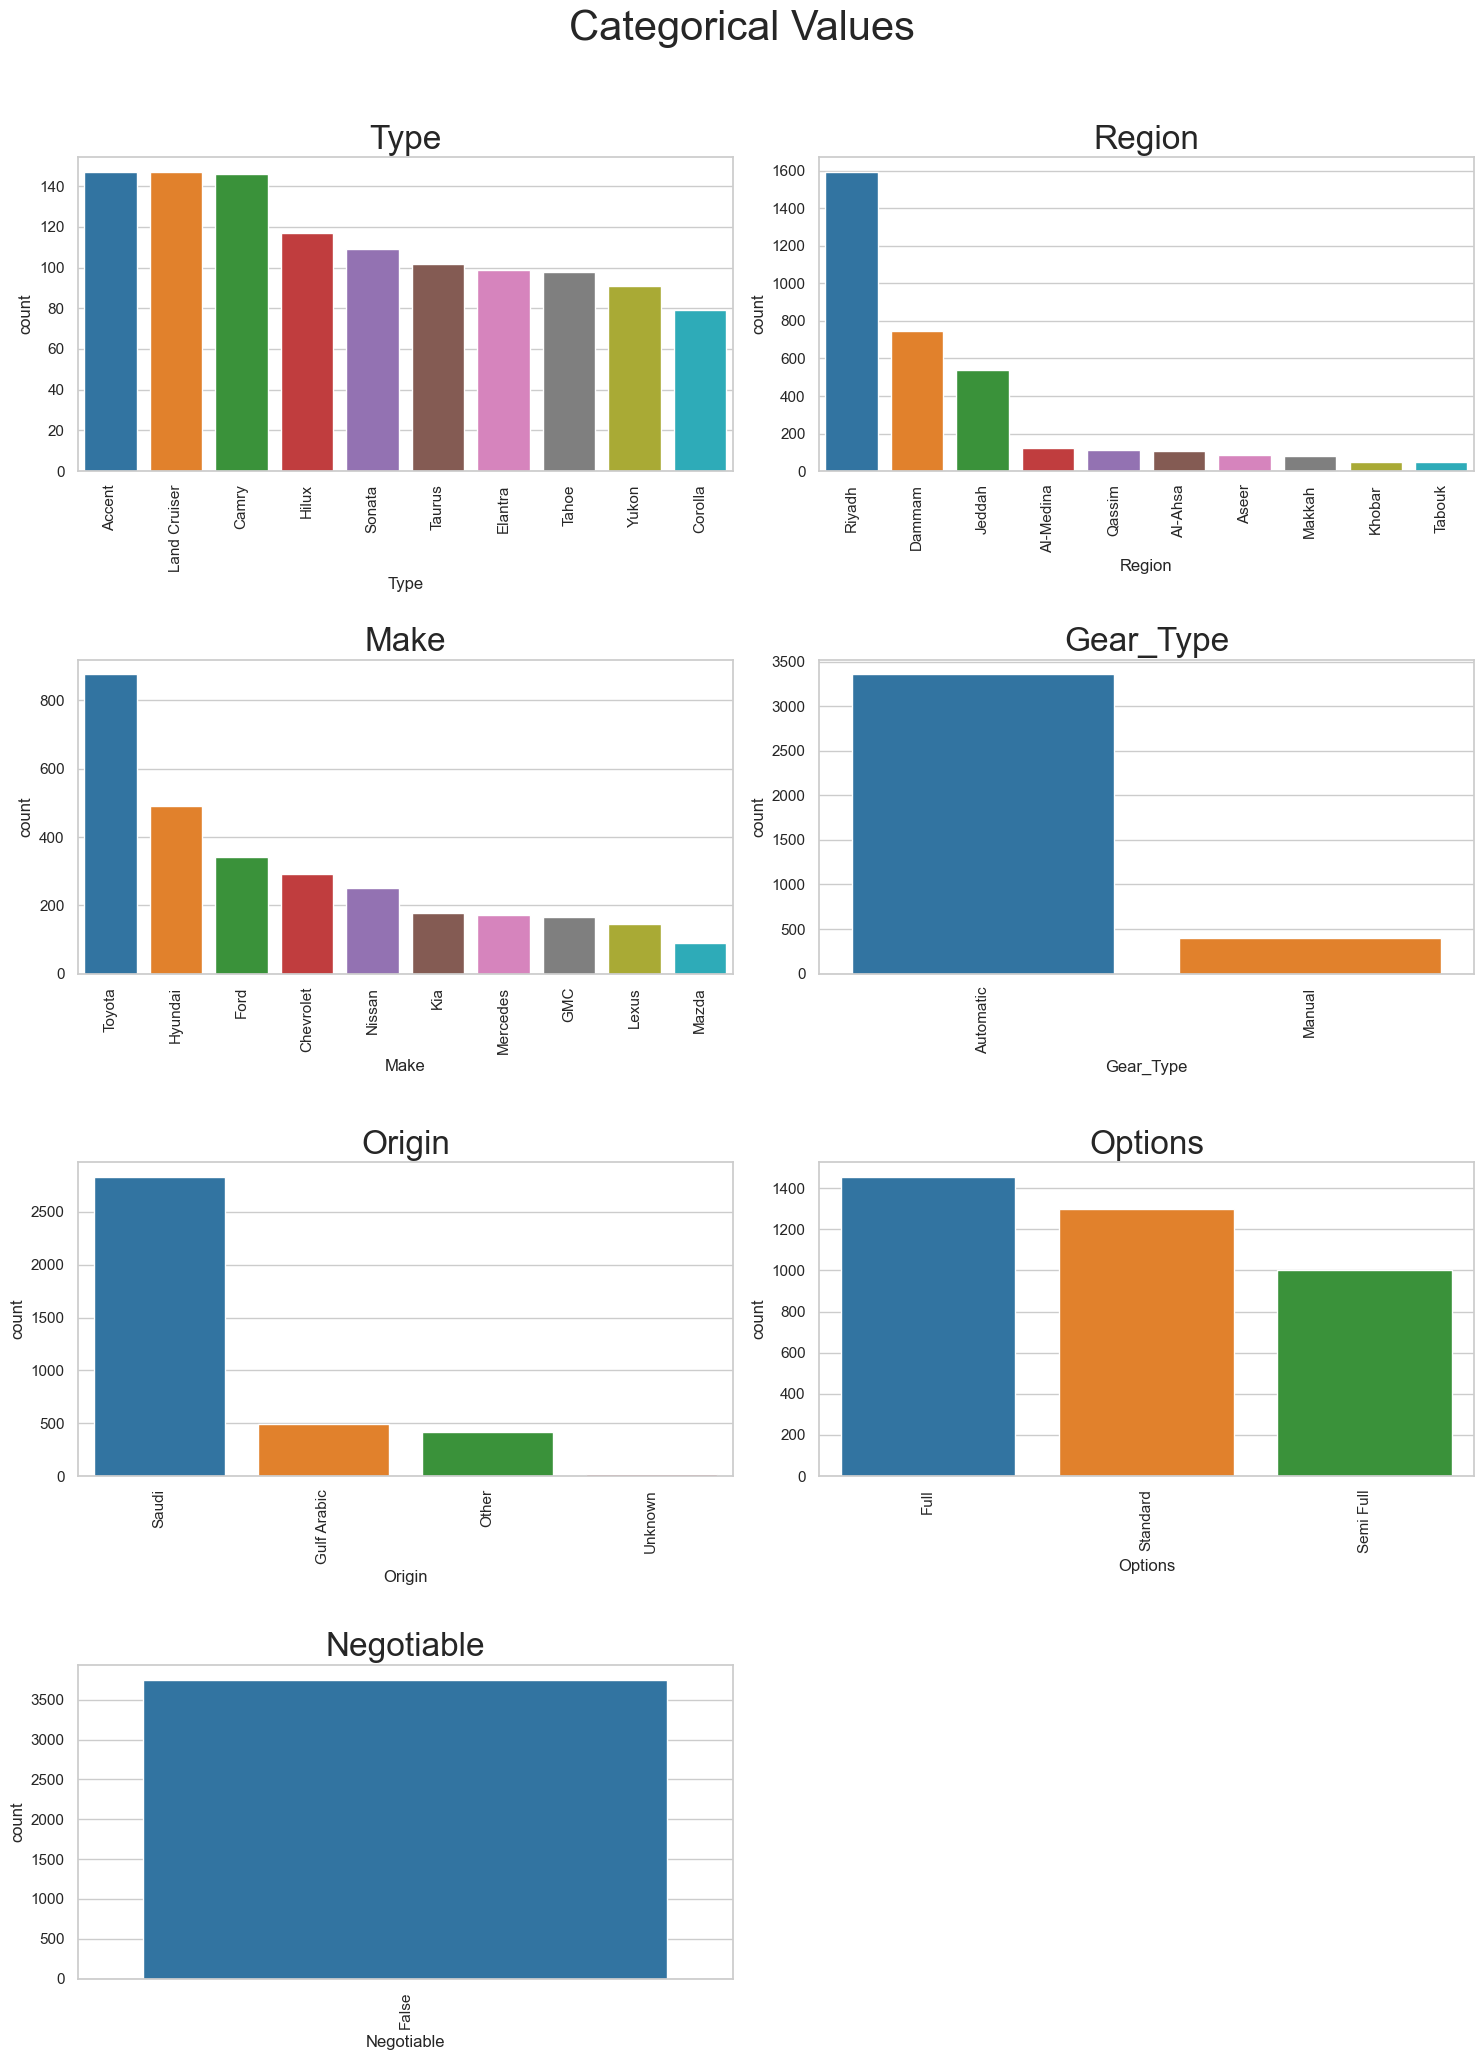

In [500]:
# Defining the categorical columns
columns = ['Type','Region','Make', 'Gear_Type', 'Origin', 'Options', 'Negotiable']

plt.figure(figsize= (15,21))

for i, variable in enumerate(columns):
      plt.subplot(4,2,i+1)
      
      top_categories = df_model[variable].value_counts().head(10).index 
      ax = sns.countplot(data= df_model, x= df_model[variable],
                         order= top_categories, palette= 'tab10')
            
      plt.xticks(rotation=90)
      plt.tight_layout()
      plt.title(variable,
                fontsize= 24)
      
plt.suptitle('Categorical Values',
             fontsize= 30)

plt.subplots_adjust(top=0.91,
                    hspace=0.6)
      
plt.show()

#### Observation

- From the 5624 available data, it has became a functional 3754 rows that can be utilized for modelling the price recommendation system. After processing the data, there are several changes in the dataset, which are Honda Accord became the car with the highest frequency in the database and now Dammam region has the most car count overall, other than that the data stays the same.

#### Numerical Values

In [501]:
# Numerical Values
print('Numerical Values:')
display(df_model.describe().astype('int64', 'float64'))

Numerical Values:


,Year,Engine_Size,Mileage,Price
count,3754,3754,3754,3754
mean,2014,3,134576,79387
std,5,1,169945,72706
min,1963,1,100,4000
25%,2013,2,49000,36000
50%,2016,2,104000,58500
75%,2018,4,183000,95000
max,2021,9,4500000,850000


##### Visualized

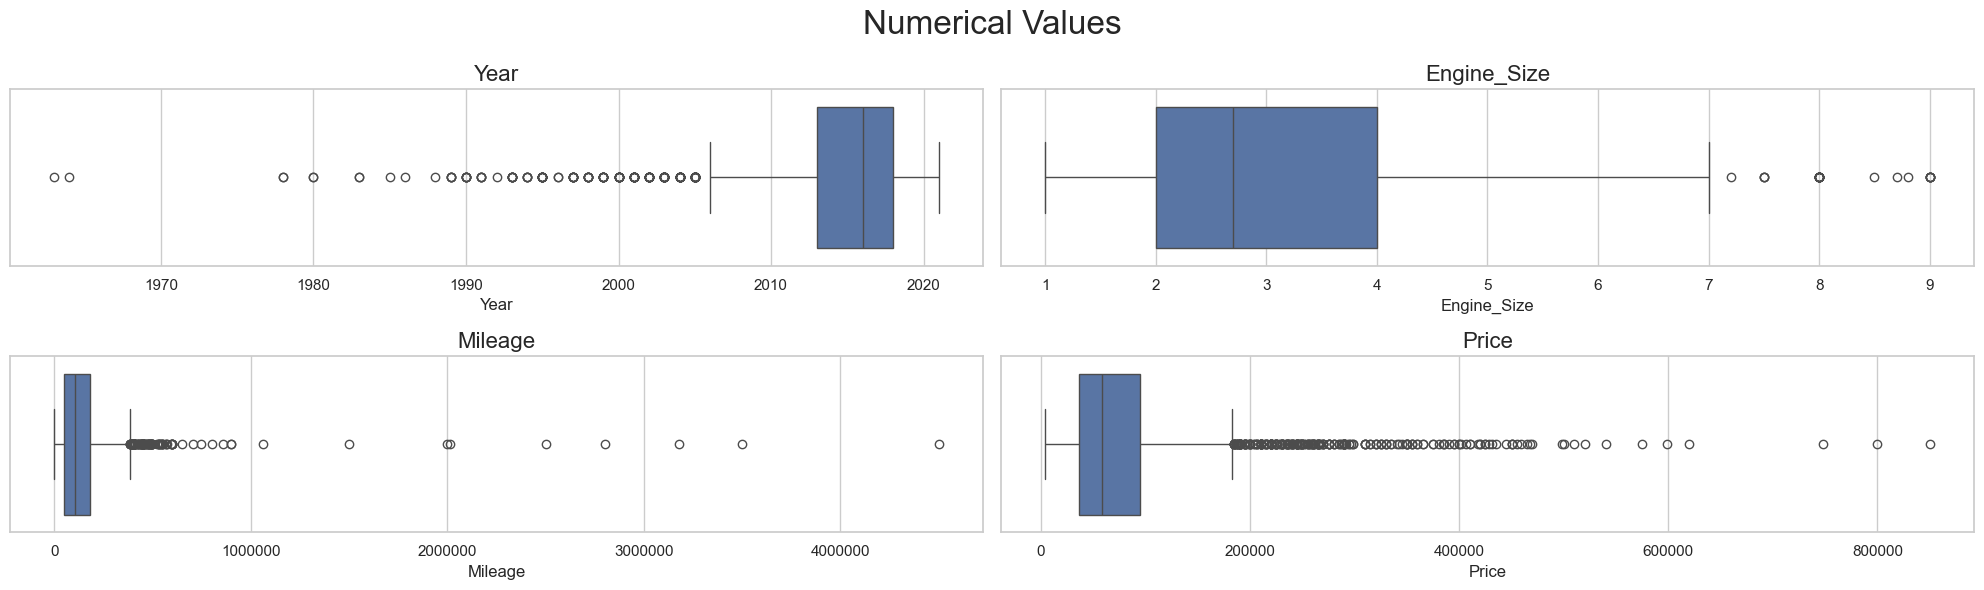

In [502]:
# Checking value range with box plot
num_feature = df.describe().columns

plt.figure(figsize= (20,6), facecolor= 'white')
sns.set(style= 'whitegrid')
plt.suptitle('Numerical Values',
             fontsize= 24)
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(2,2,plotnumber)
    sns.boxplot(data=df_model, x=feature);
    plt.title(feature, size=16)
    plt.tight_layout()
    plt.ticklabel_format(axis= 'x', style= 'plain')
    plotnumber += 1

plt.show()

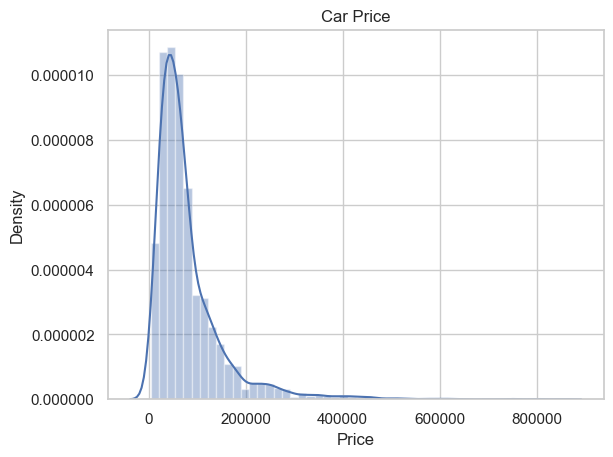

In [503]:
sns.distplot(df_model['Price']);

plt.title('Car Price')
plt.ticklabel_format(axis= 'y', style= 'plain')

plt.show()

#### Observation

- Most of the graph stays the same, with noticeable changes in the Mileage graph, where the limit is now around 5.000.000 miles, rather than 20.000.000 miles.

### **Visualized**

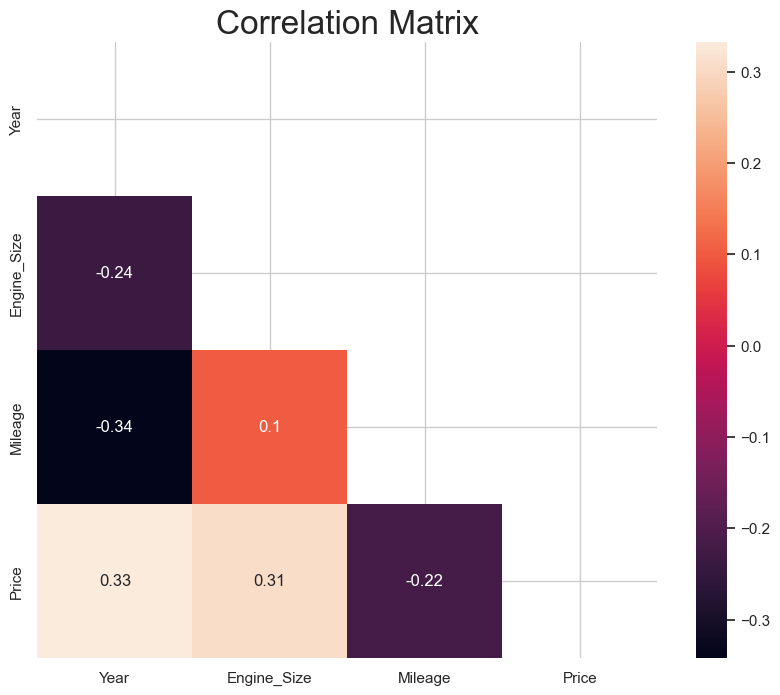

In [504]:
plt.figure(figsize= (10,8))
sns.heatmap(df_model.drop(columns= ['Negotiable']).corr(numeric_only= True), mask = np.triu(np.ones_like(df_model.drop(columns= ['Negotiable']).corr(numeric_only= True))), annot= True)
plt.title('Correlation Matrix',
          fontsize= 24)
plt.show()

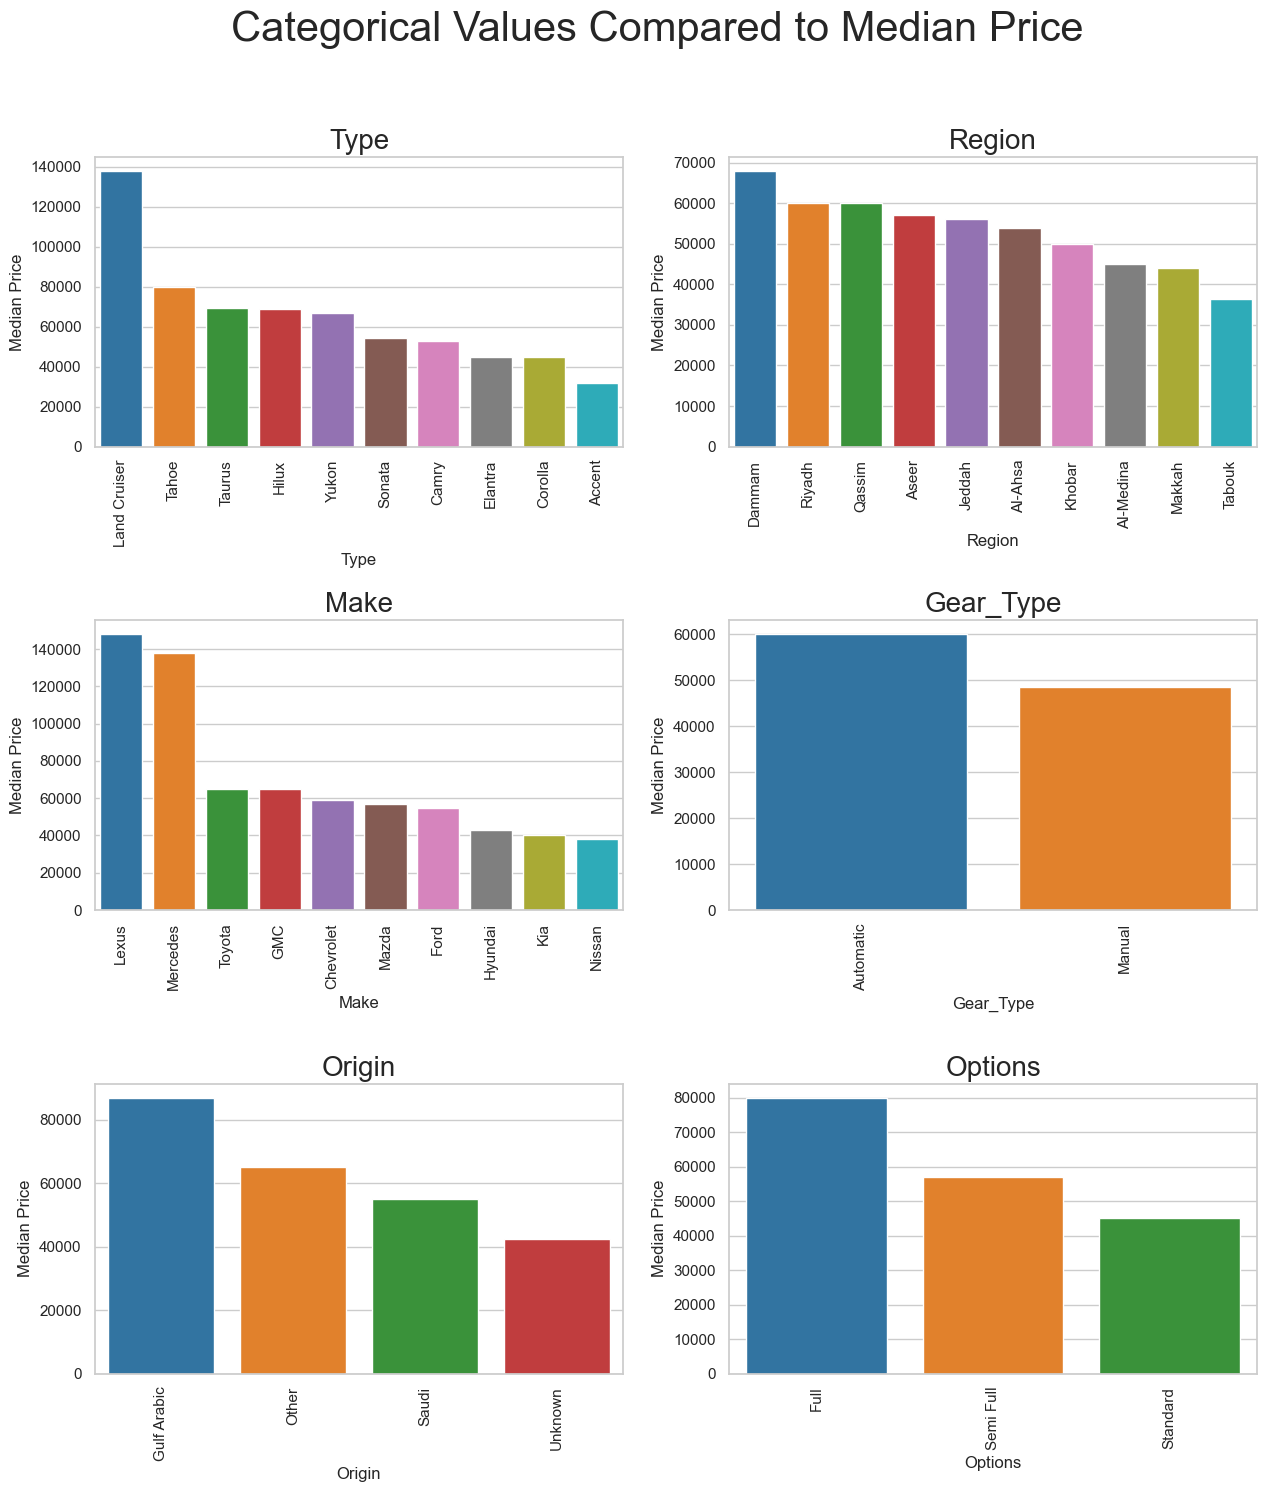

In [505]:
# Defining the categorical columns
columns = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

plt.figure(figsize=(15, 21))

for i, variable in enumerate(columns):
    plt.subplot(4, 2, i + 1)
    
    top_categories = df_model[variable].value_counts().head(10).index 
    
    # Calculate median price for top categories
    median_prices = df_model.groupby(variable)['Price'].median().loc[top_categories]
    
    # Sort categories based on median prices
    sorted_categories = median_prices.sort_values(ascending=False).index
    
    ax = sns.barplot(x=top_categories, y=median_prices, order=sorted_categories, palette='tab10')
    ax.set_ylabel('Median Price')
    
    plt.xticks(rotation=90)
    plt.title(variable, fontsize=20)
    
plt.suptitle('Categorical Values Compared to Median Price', fontsize=30)

plt.subplots_adjust(top=0.91, hspace=0.6)

plt.show()

### Observation

- Compared to the previous heatmap, the correlation between the features and the target increased, but not by significant amount.

- The bar chart has several changes too, such as the make with the highest median price is now Lexus and as for the type of car it is now the Land Cruiser.

<br>

---

## **Modeling**

### _**Defining X & y**_

In [431]:
X = df_model.drop(columns= ['Price', 'Negotiable'])
y = df_model['Price']

### Reasoning

- It is necessary to drop Price, as it is the target and assign it to a new variable which is y. As for the Negotiable column, it has only 1 boolean value, which is False, therefore it is not needed for the model.

### Checking X

In [432]:
X

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000
...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000


### Splitting & Importing Library

In [433]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= 0)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print()
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3003, 9)
y_train: (3003,)

X_test: (751, 9)
y_test: (751,)


### Reasoning

- After importing the needed library, the data is separated in to train and test dataset, with the ratio of 80% and 20%. This way the model has sufficient training and also has reasonable data to compare the result after testing them. The next step is to scale and encode the model.

<br>

---

## **Scaling & Encoding**

### _**Library**_

In [434]:
# Library for modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### _**Transformer & Encoding**_

- Gear_Type, Origin and Options are encoded using OneHotEncoder, because their unique values are less than 5. While Type, Make and Region are encoded using BinaryEncoder because their value unique values are greater than 5. As for the numerical variable in the Year, Engine_Size and Mileage columns, they are scaled using RobustScaler, because the values are skewed.

In [435]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['Gear_Type','Origin', 'Options']),
    ('Binary', BinaryEncoder(), ['Type', 'Make', 'Region']),
    ('Scale', RobustScaler(), ['Year','Engine_Size', 'Mileage'])
], remainder= 'passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('Binary', BinaryEncoder(),
                                 ['Type', 'Make', 'Region']),
                                ('Scale', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

### _**Fitting**_

In [436]:
# Fitting
transformer.fit(X_train)

# Transform
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

### _**Benchmarking**_

- Using several type of regression models is necessary, like Linear , KNeighbor, DecisionTree, RandomForest and XGBoost, to find out which model has the lowest RMSE, MAE and MAPE score. For this purpose a loop is introduced and then the value is stored into lists.

In [437]:
# Defining algorithm
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state= 0)
rf = RandomForestRegressor(random_state= 0)
xgb = XGBRegressor(random_state= 0)

# Algorithm list
models = [lr, knn, dt, rf, xgb]

# List results
score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

# Looping for each cross value
for i in models:
    
    crossval = KFold(n_splits= 5, shuffle= True, random_state= 0)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv= crossval, 
        scoring= 'neg_root_mean_squared_error'
        )

    score_rmse.append(model_cv_rmse)
    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv= crossval, 
        scoring= 'neg_mean_absolute_error'
        )

    score_mae.append(model_cv_mae)
    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv= crossval, 
        scoring= 'neg_mean_absolute_percentage_error'
        )
    
    score_mape.append(model_cv_mape)
    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

### Results

- For ease of reading and comparison, the results are shown in a dataframe.

In [438]:
# Model results
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-55255.963802,8160.052036,-34202.585674,2303.452148,-0.698880,0.030146
1,KNN Regressor,-40119.785718,7544.165093,-21999.413673,2149.726793,-0.383406,0.021784
2,DecisionTree Regressor,-51103.675841,7265.722682,-25261.574819,2082.748927,-0.389062,0.028780
3,RandomForest Regressor,-37193.977205,7187.923439,-19097.988674,2062.780020,-0.312228,0.022281
4,XGBoost Regressor,-33900.065702,5793.667023,-17611.753140,1535.316619,-0.285536,0.022374


### Observation

- The model with the lowest mean Root Mean Square Error, which indicate the error range of the recommendation, is the XGBoost Regressor model. As it turns out, the same model has the lowest mean Mean Absolute Error and mean Mean Percentage Error.

- Because there is not a significant difference (~ 10%) between the lowest model and the second lowest model, it is better to test both of them to compare the test values.

### _**Fitting the test set**_

In [439]:
# Model
models = {'RandomForest': RandomForestRegressor(random_state= 0),
        'XGBoost': XGBRegressor(random_state= 0)
}

# List result
score_rmse = []
score_mae = []
score_mape = []

# Fitting
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

# Display results
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,35207.565041,17114.726911,0.267079
XGBoost,32415.156166,16380.745504,0.251822


### Observation

- After fitting the models and testing them to get the RMSE, MAE and MAPE score, the XGBoost Regressor has the lowest value of error across all 3 scores. This model will be the benchmark of the next test, so when the model parameters are tuned, the error values are lowered.

<br>

---

## **Hyperparameter Tuning**

### _**XGBoost Regressor**_

#### Parameters

In [440]:
# Depth of XGBRegressor
max_depth = list(np.arange(1, 16))

# Learning rate
learning_rate = list(np.arange(1, 90)/100)

# Estimator Value
n_estimators = list(np.arange(50, 201))

# Hyperparam XGboost
hyperparameter_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
}

### Benchmarking

In [441]:
# Benchmark with hyperparameter
xgb = XGBRegressor(random_state= 0, verbosity= 0)

# Pipeline
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits= 5, shuffle= True, random_state= 0)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparameter_xgb,
    n_iter = 200,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 0
)

In [442]:
# Fitting
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Make',
                                                                                'Region']),
                                                                              ('Scale',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Engine_Size',
                                                                                'Mileage'])])),
                                             ('model'...
                                                                 0.27, 0.28,
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

### RMSE, MAE and MAPE results

In [443]:
# Results sorted by RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error',
                                                     'rank_test_neg_mean_absolute_error',
                                                     'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
108,0.581761,0.108336,0.070783,0.021501,119,6,0.3,"{'model__n_estimators': 119, 'model__max_depth...",-29514.430158,-43742.319440,-31152.126970,-28088.371879,-37030.192226,-33905.488135,5783.221510,1,-16380.694767,-20490.365612,-17623.480045,-16260.260224,-17241.880669,-17599.336263,1533.924369,6,-0.259945,-0.292669,-0.296944,-0.318172,-0.262219,-0.285990,0.022107,7
132,0.628100,0.184359,0.106438,0.061722,156,5,0.17,"{'model__n_estimators': 156, 'model__max_depth...",-29524.065712,-45695.813175,-29341.964456,-29541.479047,-37556.713877,-34332.007253,6488.463721,2,-16986.335183,-20190.603255,-16595.343552,-16442.901620,-16854.886675,-17414.014057,1401.303749,1,-0.278903,-0.275383,-0.284947,-0.316394,-0.246403,-0.280406,0.022358,3
97,0.669042,0.104802,0.109234,0.055748,89,6,0.23,"{'model__n_estimators': 89, 'model__max_depth'...",-28475.212667,-46834.401862,-30351.640093,-28172.120179,-37910.912727,-34348.857506,7172.260314,3,-15970.179535,-21002.686247,-16807.235126,-16034.608610,-17286.331682,-17420.208240,1857.432487,2,-0.250315,-0.284035,-0.280810,-0.308941,-0.263679,-0.277556,0.019860,1
44,0.738627,0.073822,0.073898,0.031217,180,5,0.19,"{'model__n_estimators': 180, 'model__max_depth...",-31310.303162,-44397.890583,-29500.463487,-30157.693945,-37857.003105,-34644.670856,5712.411272,4,-17475.968753,-20040.749898,-17196.115861,-16746.048490,-16956.915885,-17683.159778,1203.659323,7,-0.273046,-0.281589,-0.296637,-0.320118,-0.255450,-0.285368,0.021889,6
125,0.715304,0.153395,0.040790,0.001802,128,6,0.17,"{'model__n_estimators': 128, 'model__max_depth...",-29391.152901,-46320.266855,-30865.875015,-29197.681091,-37898.152608,-34734.625694,6609.276397,5,-16221.270577,-21041.609125,-17139.528707,-16714.633927,-16807.789406,-17584.966348,1753.165289,4,-0.255672,-0.295318,-0.292065,-0.314733,-0.243906,-0.280339,0.026384,2


In [444]:
# Check the best parameter
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_parameters:', random_xgb.best_params_)

XGBoost
Best_score: -33905.488134504754
Best_parameters: {'model__n_estimators': 119, 'model__max_depth': 6, 'model__learning_rate': 0.3}


### Observation

- Now the best parameters are available to be applied to the benchmark model, to see if there a difference in the error values.

<br>

---

## **Best Model**

In [445]:
# Model XGBoost
model = {'XGBoost': XGBRegressor(random_state= 0, verbosity= 0)}

# Define
xgb_tuning = random_xgb.best_estimator_

# Fitting
xgb_tuning.fit(X_train, y_train)

# Predict test
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Append results to list
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

# Display results
score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index= model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGBoost,32324.21695,16249.718212,0.250297


### _**Result Comparison**_

In [446]:
# Score before tuning
pd.DataFrame(score_before_tuning.loc['XGBoost']).T

,RMSE,MAE,MAPE
XGBoost,32415.156166,16380.745504,0.251822


In [447]:
# Score after tuning
score_after_tuning

,RMSE,MAE,MAPE
XGBoost,32324.21695,16249.718212,0.250297


### Observation

- The final result of the test shows the RMSE value at 32.324, while MAE at 16.249 Riyal and MAPE at 25.1%. It shows that the model has an mean absolute error of 16.249 Riyal when compared to the test data.

- RMSE value will always be greater than the MAE, but it show that on individual level, that this model has a high error range and could be improved.

- The error values are lowered across the board after using the best parameter. The values are 90 for the RMSE, 140 for the MAE and 0.001 for the MAPE. With this, it could be said that the model using the best parameter is more accurate in predicting the car price, but only slightly.

### _**Visualization**_

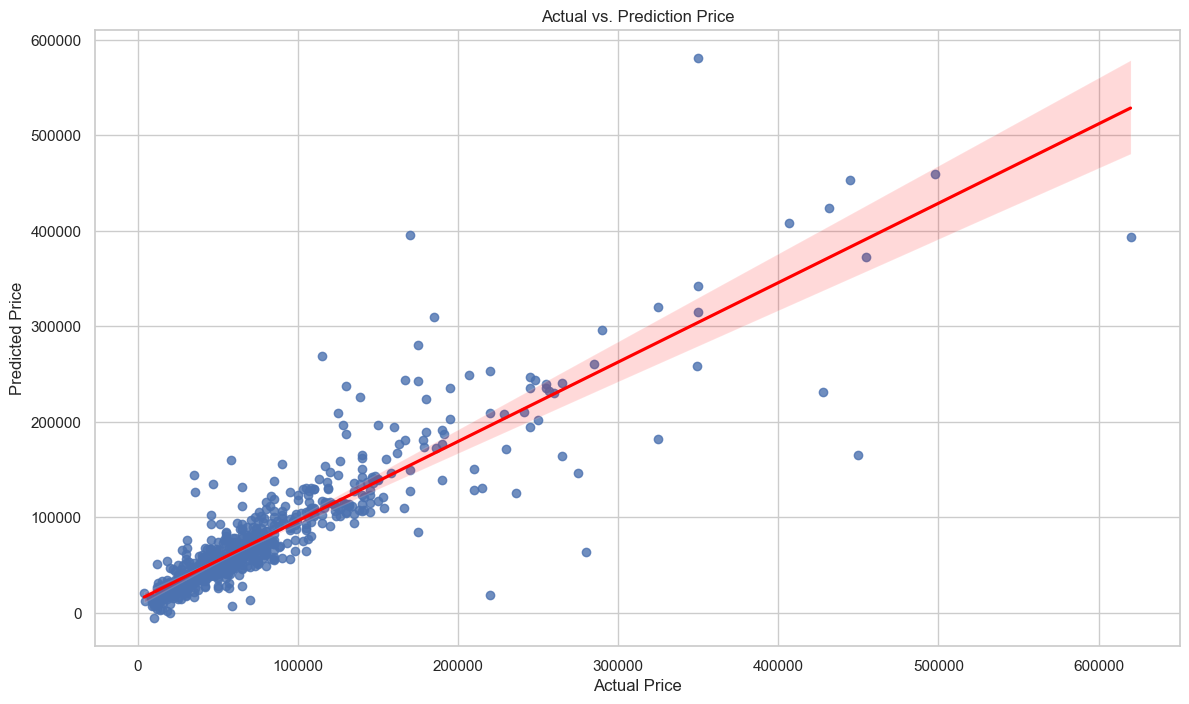

In [459]:
# Regplot of the test in relation to the prediction with XGBRegression
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning, line_kws={"color": "red"}).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

### Observation

- When the data is visualized, it can clearly be seen that the RMSE, MAE, MAPE score are high because the prices of expensive cars are more spread out. In other words, the model could give an over- or underestimation of the price with an error rate of 25%, which from what I have learnt is an acceptable prediction model result.

- Car prices that are under 150.000 Riyal follows the prediction more closely than cars with prices above 150.000 Riyal, because the price fluctuates greatly for expensive / luxury cars.

<br>

---

## **Feature Importance**

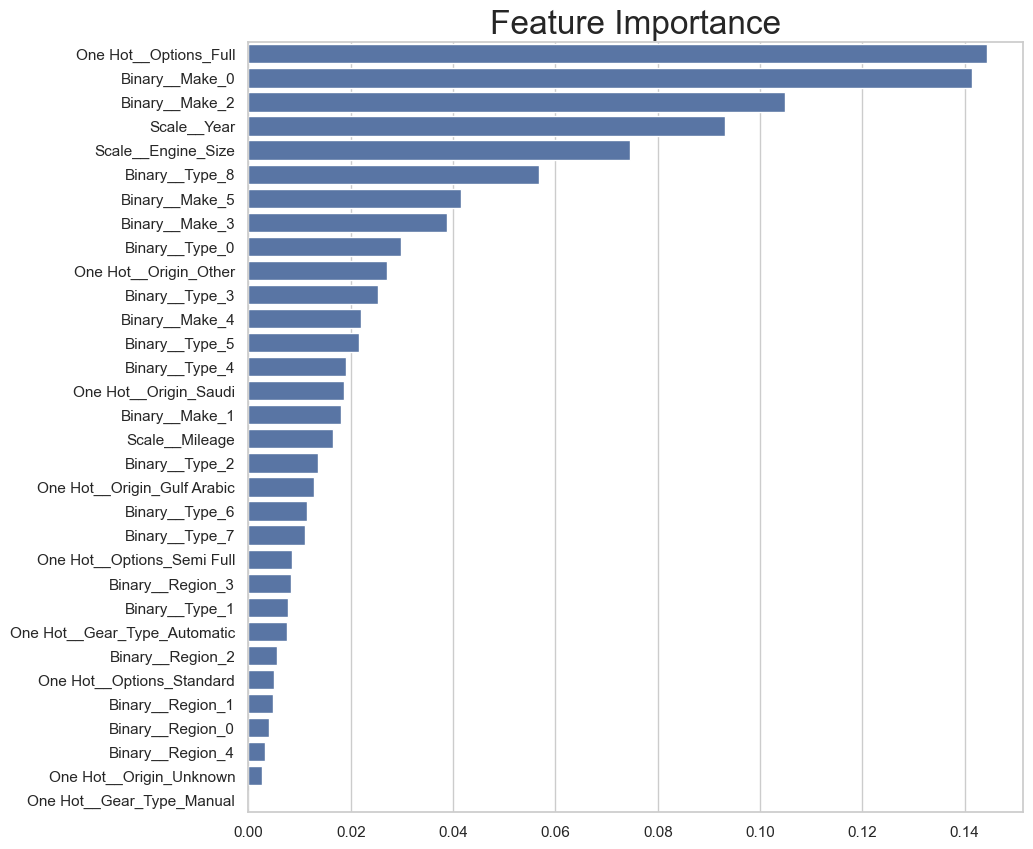

In [449]:
# Plot name of feature importance
plt.figure(figsize=(10, 10))
features = pd.Series(xgb_tuning['model'].feature_importances_,
                        transformer.get_feature_names_out()).sort_values(ascending= False)
sns.barplot(data= features,
            orient= 'h')
plt.title('Feature Importance',
          fontsize= 24)

plt.show()

### Observation

- It shown by the graph that there are several columns that has little importance when modelling, which are the Region and Gear columns, because they rank low in the graph. That is why both of these columns could be dropped when modeling the next dataset using the same model and parameter. Whereby Options, Make, Year and Engine_Size have more significant impact to the price.

- To prove that the columns have little importance, they need to be tested according to their type. Which resulted in a Kruskal-Wallis test for the region column, seeing that it has 28 unique values and Chi-Squared test for the gear column as it has 2 categorical values.

<br>

---

## **Feature Selection**

### Checking the Region Column

- Hypothesis Testing:

1. H0: Region has no significant impact on price
2. Ha: Region has significant impact on price

In [450]:
display(df_model['Region'].value_counts())
print('Total Unique Values:', df_model['Region'].nunique())

Region
Riyadh            1594
Dammam             747
Jeddah             537
Al-Medina          123
Qassim             110
Al-Ahsa            109
Aseer               84
Makkah              82
Khobar              49
Tabouk              49
Taef                47
Jazan               34
Jubail              30
Abha                29
Hail                22
Al-Baha             17
Najran              16
Yanbu               15
Hafar Al-Batin      14
Al-Jouf             14
Al-Namas            10
Wadi Dawasir         5
Arar                 5
Qurayyat             4
Sakaka               4
Besha                3
Sabya                1
Name: count, dtype: int64

Total Unique Values: 27


#### Observation

1. The region Sabya has only 1 row, which cannot be implemented in the Kruskal-Wallis test, therefore it is better to remove the row during the test.

In [451]:
# Library

from scipy.stats import kruskal

### Kruskal-Wallis Test

In [452]:
# Drop unnecessary column that impede the test
df_model.drop(df_model[df_model['Region'] == 'Sabya'].index, inplace= True)

# Unique values in the column
regions = df_model['Region'].unique()
print()

# Looping the test against the target (Price)
for region in regions:
    prices = df_model[df_model['Region'] == region]['Price']
    
    stat, pval = kruskal(*prices)
    
    print(f"Region: {region}")
    print(f"p-value: {pval}")
    
    # Print results
    if pval < 0.05:
        print("- Result: Reject H0/Accept Ha, have significant impact on the target")
    else:
        print("+ Result: Accept H0/Reject Ha, have no significant impact on the target")
    print()


Region: Riyadh
p-value: 0.49528806878777615
+ Result: Accept H0/Reject Ha, have no significant impact on the target

Region: Hafar Al-Batin
p-value: 0.44781167431949154
+ Result: Accept H0/Reject Ha, have no significant impact on the target

Region: Abha
p-value: 0.46444756489685635
+ Result: Accept H0/Reject Ha, have no significant impact on the target

Region: Makkah
p-value: 0.4791013816902697
+ Result: Accept H0/Reject Ha, have no significant impact on the target

Region: Dammam
p-value: 0.49311441530042877
+ Result: Accept H0/Reject Ha, have no significant impact on the target

Region: Jeddah
p-value: 0.4918767402263443
+ Result: Accept H0/Reject Ha, have no significant impact on the target

Region: Khobar
p-value: 0.4728497205477449
+ Result: Accept H0/Reject Ha, have no significant impact on the target

Region: Al-Baha
p-value: 0.45296080948699435
+ Result: Accept H0/Reject Ha, have no significant impact on the target

Region: Al-Ahsa
p-value: 0.4819018260781998
+ Result: Accep

#### Analysis

1. With the Kruskal-Wallis test it is shown that all of the region, except for Sabya (as more data is needed), have no impact on the price, therefore it can be removed, as also shown in the feature importance graphic.

### Checking the Gear_Type Column

- Hypothesis Testing:

1. H0: Gear_Type has no significant impact on price
2. Ha: Gear_Type has significant impact on price

In [453]:
display(df_model['Gear_Type'].value_counts())
print('Total Unique Values:', df_model['Gear_Type'].nunique())

Gear_Type
Automatic    3356
Manual        397
Name: count, dtype: int64

Total Unique Values: 2


#### Observation

1. Because the Gear_Type has only 2 unique values, a Chi-Squared test could be implemented to see the significance of this feature to the target.

### Chi-Squared Test

In [454]:
from scipy.stats import chi2_contingency

gears = pd.crosstab(df['Gear_Type'], df['Price'])

chi2_stat, p_val, _, _ = chi2_contingency(gears)

print("p-value:", p_val)

if pval < 0.05:
    print("- Result: Reject H0/Accept Ha, have significant impact on the target")
else:
    print("+ Result: Accept H0/Reject Ha, have no significant impact on the target")

p-value: 0.11510442450513778
+ Result: Accept H0/Reject Ha, have no significant impact on the target


#### Analysis

1. With the Chi-Squared test it is shown that the Gear_Type column have no impact on the price, therefore it can be removed, as also shown in the feature importance graphic.

## **Conclusion**

After selecting the XGBoost Regression model and its best parameter, it is shown that the model has a reasonable error margin at around 25%, considering the price range of the cars. It means that when a car is listed on the website, the recommendation given by the model will give an approximate range of the price correctly 75% of the time.

To better streamline the model and still give a reasonably accurate recommendation, the feature selection graph could be taken into consideration. Where it can be said that Options, Make, Year and Engine_Size, has the strongest impact on price and other columns could be disregarded.

In a sense, older cars will have lower prices, except in certain scenario (like luxury / collectable cars). While bigger engine size is more frequent in more expensive cars, where mass produced car will have smaller engine to be more efficient. As for the make of the car, it will certainly impact price as some car makers are more prefered than others.

This model will certainly help the seller, even considering the range of error, to give an approximation of the price that the car should be sold at. In relation to that, if the seller is able to list the car without under- or overselling it, the prices will have a more uniform distribution and could produce a better model. 

In the end the model is only as accurate as the data it was given, so to improve the recommendation more data could be inserted to the model. For example, even though the price is negotiable, it should still be given the price that the seller will accept. By gaining more than 30% of the data in this dataset, the model could predict more accurately.

<br>

---

## **Recommendation**

Like any recommendation system, it can also be compared to the real price that is inputted by the seller themselves, this is also known as A/B testing. It is possible to improve the model using A/B testing, because it may introduce new data which will have an impact on price.

Other ways to improve the model are listed down below.

1. Generally there are two classes of cars, one is luxurious and the other normal. If the data were to be divided into normal and luxurious, where the normal cars overall have a more uniform price and luxury cars price is not greatly affected by year or mileage. In that case, when the model only predict the normal car price, it could have given a more accurate recommendation to the sellers. Whereby more tuning and more feature may be required to improve the model of luxury cars.

2. Another way is take note of the price fluctuation after the seller has listed their price. That way there is a detailed record of the price change in relation to time and that could indicate, if the car in question is easily sold or hard to sell. With this data the model can adjust the recommendation by looking at the median of the price, so that it may give a more accurate recommendation.

3. The other way to improve the model is to add more data to the dataset to be trained and tested.

---

## **Save Model**

In [460]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Used_Cars_XGB.sav', 'wb'))

In [461]:
# Load model
filename = 'Model_Used_Cars_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [462]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

32415.15616553619